In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


<br>Load libraries

In [3]:
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt

<br>Load data

In [4]:
barcode = pd.read_json("barcode_search_results.json")
synthetic = pd.read_json("synthetic_search_results.json")

<br>

## Transform II.
Loads all InChIKeys, InChIKey hits and detects True-positive (TP) or False-positive (FP) hits (binary column).

In [5]:
def InChIKeys(file_data):
  InChIKey = [[i['InChIKey'],int(j['InChIKey_hits']),
               i['InChIKey']==int(j['InChIKey_hits'])]
              for i in file_data['records']
              for j in i['spectrumCollections'][0]['spectra'][0]['hits']]
  InChIKey = pd.DataFrame({'InChIKey':[row[0] for row in InChIKey],
                         'InChIKey_hits':[row[1] for row in InChIKey],
                         'Positivity':[row[2] for row in InChIKey]})
  return InChIKey

<br>

## Transform IV.
Group TP and FP hits for each record.

In [6]:
def number_TP_FP(InChIKey):
  number = InChIKey.groupby(['InChIKey','Positivity']).count()
  return number

<br>Function for printing InChIKey data

In [7]:
def disp(InChIKey,number):
  print(InChIKey)
  all_InChIKey = len(InChIKey.groupby('InChIKey').count())
  true_positive = len(InChIKey.loc[InChIKey['Positivity'] == True ].groupby(['InChIKey','Positivity']).count())
  false_positive = all_InChIKey - true_positive
  print("\n==========================================================================")
  print(f"Number of all InChIKey: {all_InChIKey}")
  print(f"Number of all true-positive (at least one hit per record was positive): {true_positive}")
  print(f"Number of all true-positive (relative value): {round(true_positive/all_InChIKey*100,2)} %")
  print(f"Number of all false-positive (all hits per record were negative): {false_positive}")
  print(f"Number of all false-positive (relative value): {round(false_positive/all_InChIKey*100,2)} %")
  print("==========================================================================\n")
  print(number)

<br>Barcode data

In [8]:
disp(InChIKeys(barcode),number_TP_FP(InChIKeys(barcode)))

     InChIKey  InChIKey_hits  Positivity
0          33             33        True
1          33             27       False
2          24             24        True
3          44             37       False
4          44             44        True
..        ...            ...         ...
262        81             52       False
263        81             81        True
264        81             75       False
265        34             34        True
266        34             69       False

[267 rows x 3 columns]

Number of all InChIKey: 94
Number of all true-positive (at least one hit per record was positive): 88
Number of all true-positive (relative value): 93.62 %
Number of all false-positive (all hits per record were negative): 6
Number of all false-positive (relative value): 6.38 %

                     InChIKey_hits
InChIKey Positivity               
0        True                    1
1        True                    1
2        True                    1
3        False               

<br>Synthetic data

In [9]:
disp(InChIKeys(synthetic),number_TP_FP(InChIKeys(synthetic)))

     InChIKey  InChIKey_hits  Positivity
0          33             33        True
1          33             27       False
2          33             27       False
3          24             24        True
4          44             44        True
..        ...            ...         ...
295        46             46        True
296        81             75       False
297        81             52       False
298        34             34        True
299        34             34        True

[300 rows x 3 columns]

Number of all InChIKey: 95
Number of all true-positive (at least one hit per record was positive): 85
Number of all true-positive (relative value): 89.47 %
Number of all false-positive (all hits per record were negative): 10
Number of all false-positive (relative value): 10.53 %

                     InChIKey_hits
InChIKey Positivity               
0        True                    2
1        True                    2
2        True                    1
3        False             

<br>

## Transform III.
Loads all Metadata, Metadata hits and calculates their absolute difference.

In [10]:
def Metadatas(file):

  # Load Metadata
  Metadata = [[float(j['metadata']['metadata.analyzer']),
             float(j['metadata']['metadata.polarity']),
             j['metadata']['metadata.scanRangeMax'],
             j['metadata']['metadata.scanRangeMin'],
             j['metadata']['msStageTarget'],
             j['metadata']['nce'],
             float(j['metadata']['ionActivation']),
             float(k['metadata']['metadata.analyzer_hits']),
             float(k['metadata']['metadata.polarity_hits']),
             k['metadata']['metadata.scanRangeMax_hits'],
             k['metadata']['metadata.scanRangeMin_hits'],
             k['metadata']['msStageTarget_hits'],
             k['metadata']['nce_hits'],
             float(k['metadata']['ionActivation_hits'])]
            for i in file['records']
            for j in i['spectrumCollections'][0]['spectra']
            for k in i['spectrumCollections'][0]['spectra'][0]['hits']]

  # Metadata values
  Values = pd.DataFrame({'Analyzer':[row[0] for row in Metadata],
                         'Polarity':[row[1] for row in Metadata],
                         'ScanRangeMax':[row[2] for row in Metadata],
                         'ScanRangeMin':[row[3] for row in Metadata],
                         'MsStageTarget':[row[4] for row in Metadata],
                         'NCE':[row[5] for row in Metadata],
                         'IonActivation':[row[6] for row in Metadata]})
  
  # Metadata hit values
  Hits = pd.DataFrame({'Analyzer':[row[7] for row in Metadata],
                       'Polarity':[row[8] for row in Metadata],
                       'ScanRangeMax':[row[9] for row in Metadata],
                       'ScanRangeMin':[row[10] for row in Metadata],
                       'MsStageTarget':[row[11] for row in Metadata],
                       'NCE':[row[12] for row in Metadata],
                       'IonActivation':[row[13] for row in Metadata]})

  # Absolute differences
  Differences = pd.DataFrame({'Analyzer':[abs(row[0]-row[7]) for row in Metadata],
                            'Polarity':[abs(row[1]-row[8]) for row in Metadata],
                            'ScanRangeMax':[abs(row[2]-row[9]) for row in Metadata],
                            'ScanRangeMin':[abs(row[3]-row[10]) for row in Metadata],
                            'MsStageTarget':[abs(row[4]-row[11]) for row in Metadata],
                            'NCE':[abs(row[5]-row[12]) for row in Metadata],
                            'IonActivation':[abs(row[6]-row[13]) for row in Metadata]})
  return Differences, Values, Hits

<br>

### Barcode Metadata
Absolute difference of Metadata and its hit.

In [11]:
[Differences, Values, Hits] = Metadatas(barcode)
Differences

,Analyzer,Polarity,ScanRangeMax,ScanRangeMin,MsStageTarget,NCE,IonActivation
0,1.0,0.0,0.194655,0.0,0.0,0.052632,1.0
1,1.0,0.0,0.194655,0.0,0.0,0.052632,1.0
2,1.0,0.0,0.194821,0.0,0.0,0.052632,0.0
3,1.0,0.0,0.194512,0.0,0.0,0.026316,1.0
4,1.0,0.0,0.194512,0.0,0.0,0.026316,1.0
...,...,...,...,...,...,...,...
262,1.0,0.0,0.113339,0.0,0.0,0.000000,0.0
263,1.0,0.0,0.113339,0.0,0.0,0.000000,0.0
264,1.0,0.0,0.113339,0.0,0.0,0.000000,0.0
265,1.0,0.0,0.113322,0.0,0.0,0.052632,0.0


<br>

### Synthetic Metadata
Absolute difference of Metadata and its hit.

In [12]:
[Differences, Values, Hits] = Metadatas(synthetic)
Differences

,Analyzer,Polarity,ScanRangeMax,ScanRangeMin,MsStageTarget,NCE,IonActivation
0,1.0,0.0,0.194655,0.0,0.0,0.157895,1.0
1,1.0,0.0,0.194655,0.0,0.0,0.157895,1.0
2,1.0,0.0,0.194655,0.0,0.0,0.026316,1.0
3,1.0,0.0,0.194821,0.0,0.0,0.078947,0.0
4,1.0,0.0,0.194512,0.0,0.0,0.210526,0.0
...,...,...,...,...,...,...,...
295,1.0,0.0,0.113277,0.0,0.0,0.236842,0.0
296,1.0,0.0,0.113339,0.0,0.0,0.184211,0.0
297,1.0,0.0,0.113339,0.0,0.0,0.000000,0.0
298,1.0,0.0,0.113322,0.0,0.0,0.289474,0.0


<br>

## Load I.

Calculates relative ranks (Cosine, Denver, Nist) and specifies them by TP/FP hits.

In [13]:
def relative_ranks(file,f_type):

  # Load file
  import json
  with open(file) as data_file:    
      data = json.load(data_file)  
  data_norm = pd.json_normalize(data,record_path=['records'])

  # Presets
  rrank_cosine, rrank_denver, rrank_nist = [], [], []
  cosine_tp, denver_tp, nist_tp = [], [], []
  cosine_fp, denver_fp, nist_fp = [], [], []

  InChIKey = InChIKeys(f_type)
  count = 0

  for i in range(len(data_norm)):
    
    # Number of hits for each record
    num_of_hits = len(data['records'][i]['spectrumCollections'][0]['spectra'][0]['hits'])
    for k in range(num_of_hits):

      # Ranks data
      cosine = data['records'][i]['spectrumCollections'][0]['spectra'][0]['hits'][k]['cosineMatch_rank']
      denver = data['records'][i]['spectrumCollections'][0]['spectra'][0]['hits'][k]['denverMatch_rank']
      nist = data['records'][i]['spectrumCollections'][0]['spectra'][0]['hits'][k]['nistMatch_rank']
      
      # Relative ranks
      if(num_of_hits == 1):
        score_cosine, score_denver, score_nist = 0, 0, 0
      else:
        score_cosine = (cosine - 1) / (num_of_hits - 1)
        score_denver = (denver - 1) / (num_of_hits - 1)
        score_nist = (nist- 1) / (num_of_hits - 1)

      rrank_cosine.append(score_cosine)
      rrank_denver.append(score_denver)
      rrank_nist.append(score_nist)

      # Relative ranks vs. TP/FP hits
      if InChIKey['Positivity'][count] == True:
        cosine_tp.append(score_cosine)
        denver_tp.append(score_denver)
        nist_tp.append(score_nist)
      else:
        cosine_fp.append(score_cosine)
        denver_fp.append(score_denver)
        nist_fp.append(score_nist)
      count += 1

  # Output data
  rrank = pd.DataFrame({'Cosine': rrank_cosine,
                        'Denver': rrank_denver,
                        'Nist': rrank_nist})
  rank_tp = pd.DataFrame({'Cosine': cosine_tp,
                        'Denver': denver_tp,
                        'Nist': nist_tp})
  rank_fp = pd.DataFrame({'Cosine': cosine_fp,
                        'Denver': denver_fp,
                        'Nist': nist_fp})
  return rrank, rank_tp, rank_fp

<br>Plots of TP/FP hits of relative ranks (FP hits lie over TP hits) for Barcode library.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


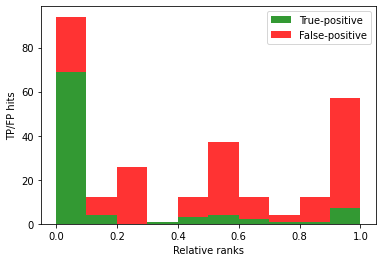

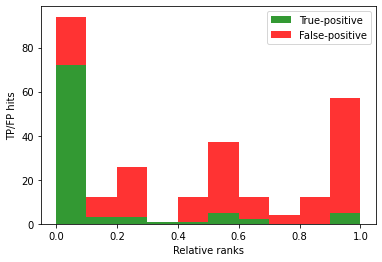

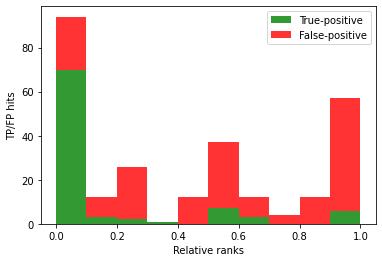

In [42]:
# Loads ranks
[rrank, rank_tp, rank_fp] = relative_ranks('barcode_search_results.json',barcode)

# Presets
metrics = ['Cosine','Denver','Nist']

# Plots histograms
for metric in range(len(metrics)):
  plt.figure(metric)
  plt.hist([rank_tp[metrics[metric]],rank_fp[metrics[metric]]], color=['green','red'],
           stacked=True, alpha=0.8, label=['True-positive','False-positive'])
  plt.xlabel("Relative ranks")
  plt.ylabel("TP/FP hits")
  plt.legend(loc='upper right')
  plt.savefig(f"barcode_hist_{metrics[metric]}.png", dpi=600)
plt.show()

<br>Plots of TP/FP hits of relative ranks (FP hits lie over TP hits) for Synthetic library.

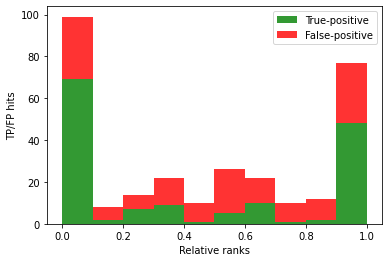

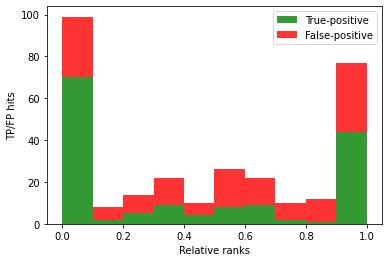

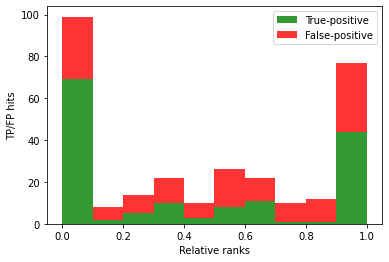

In [43]:
# Loads ranks
[rrank, rank_tp, rank_fp] = relative_ranks('synthetic_search_results.json',synthetic)

# Presets
metrics = ['Cosine','Denver','Nist']

# Plots histograms
for metric in range(len(metrics)):
  plt.figure(metric)
  plt.hist([rank_tp[metrics[metric]],rank_fp[metrics[metric]]], color=['green','red'],
           stacked=True, alpha=0.8, label=['True-positive','False-positive'])
  plt.xlabel("Relative ranks")
  plt.ylabel("TP/FP hits")
  plt.legend(loc='upper right')
  plt.savefig(f"synthetic_hist_{metrics[metric]}.png", dpi=600)
plt.show()

<br>

## Load II.

Correlation between the difference of Metadata and its hit against TP/FP InChIKey.

In [16]:
def crrl(Differences,num):
  # Processed data/methods
  meta_titles = ['Analyzer','Polarity','ScanRangeMax','ScanRangeMin',
                'MsStageTarget','NCE','IonActivation']
  methods = ['pearson','kendall','spearman']
  num = 1.0*num['Positivity']

  # Calculation of correlation
  crrC = {}
  for j in meta_titles:
    df = pd.DataFrame({'Data': Differences[j],
                    'Positivity': num})
    crrl = []
    for i in range(3):
      crrl.append(round(df.corr(method=methods[i]).iloc[0,1],4))
    crrC[j] = crrl
  crrC = pd.DataFrame.from_dict(crrC,orient='index',columns=[method.capitalize()
  for method in methods])
  return crrC

<br>Barcode correlation

In [17]:
[Differences, Values, Hits] = Metadatas(barcode)
crrl(Differences,InChIKeys(barcode))

,Pearson,Kendall,Spearman
Analyzer,NaN,NaN,NaN
Polarity,NaN,NaN,NaN
ScanRangeMax,0.2063,0.1474,0.1743
ScanRangeMin,0.1197,0.1197,0.1198
MsStageTarget,NaN,NaN,NaN
NCE,0.2161,0.2478,0.2710
IonActivation,0.1451,0.1451,0.1451


The value **NaN** means the zero value of the standard deviation $\sigma$ in correlation $\mu$ (correlation is inversely related to standard deviation.).

<br>Barcode boxplot ($\mu$ is mean value, $\sigma$ is standard deviation)

*   blue colour - Metadata
*   red colour - Metadata hits
*   green dot - mean value

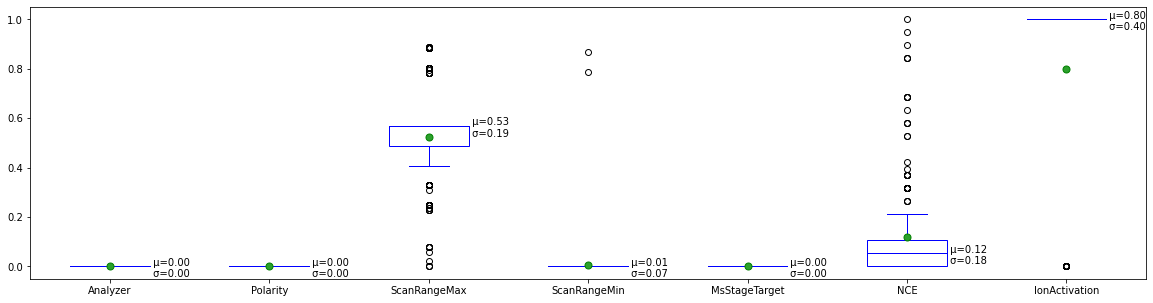

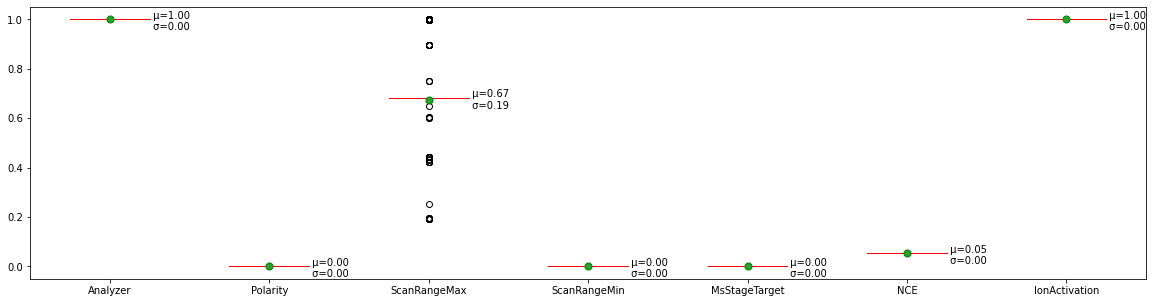

In [18]:
def box_plot(data, edge_color, fill_color, meta_titles):
    bp = plt.boxplot(data, patch_artist=True, labels=meta_titles,
                     showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "green",
                       "markersize": "7"})
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

[Differences, Values, Hits] = Metadatas(barcode)
meta_titles = ['Analyzer','Polarity','ScanRangeMax','ScanRangeMin',
                'MsStageTarget','NCE','IonActivation']
data = []
for title in meta_titles:
  data.append(Values[title])
plt.figure(figsize=(20,5))
bp = box_plot(data, 'blue', 'white', meta_titles)
m1 = np.array(data).mean(axis=1)
st1 = np.array(data).std(axis=1)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    plt.annotate(text, xy=(x, y), verticalalignment='center_baseline')
data2 = []
for title in meta_titles:
  data2.append(Hits[title])
plt.figure(figsize=(20,5))
bp2 = box_plot(data2, 'red', 'white', meta_titles)
m2 = np.array(data2).mean(axis=1)
st2 = np.array(data2).std(axis=1)
for i, line in enumerate(bp2['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m2[i], st2[i])
    plt.annotate(text, xy=(x, y), verticalalignment='center_baseline')
plt.show()

<br>Synthetic correlation

In [19]:
[Differences, Values, Hits] = Metadatas(synthetic)
crrl(Differences,InChIKeys(synthetic))

,Pearson,Kendall,Spearman
Analyzer,NaN,NaN,NaN
Polarity,NaN,NaN,NaN
ScanRangeMax,0.1276,0.1038,0.1248
ScanRangeMin,NaN,NaN,NaN
MsStageTarget,NaN,NaN,NaN
NCE,0.0904,0.0680,0.0811
IonActivation,-0.0707,-0.0707,-0.0707


The value **NaN** means the zero value of the standard deviation $\sigma$ in correlation $\mu$ (correlation is inversely related to standard deviation.).

<br>Synthetic boxplot ($\mu$ is mean value, $\sigma$ is standard deviation)

*   blue colour - Metadata
*   red colour - Metadata hits
*   green dot - mean value

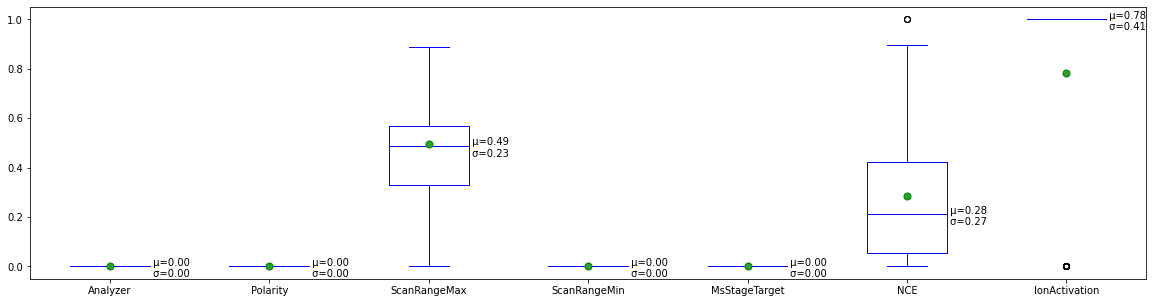

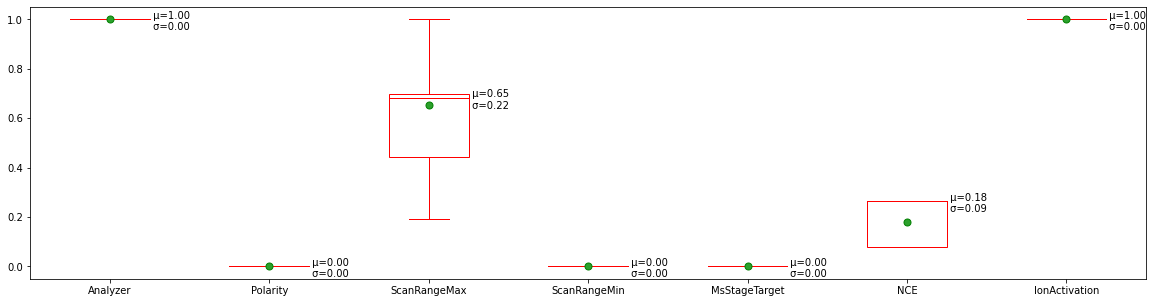

In [20]:
def box_plot(data, edge_color, fill_color, meta_titles):
    bp = plt.boxplot(data, patch_artist=True, labels=meta_titles,
                     showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "green",
                       "markersize": "7"})
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

[Differences, Values, Hits] = Metadatas(synthetic)
meta_titles = ['Analyzer','Polarity','ScanRangeMax','ScanRangeMin',
                'MsStageTarget','NCE','IonActivation']
data = []
for title in meta_titles:
  data.append(Values[title])
plt.figure(figsize=(20,5))
bp = box_plot(data, 'blue', 'white', meta_titles)
m1 = np.array(data).mean(axis=1)
st1 = np.array(data).std(axis=1)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    plt.annotate(text, xy=(x, y), verticalalignment='center_baseline')
data2 = []
for title in meta_titles:
  data2.append(Hits[title])
plt.figure(figsize=(20,5))
bp2 = box_plot(data2, 'red', 'white', meta_titles)
m2 = np.array(data2).mean(axis=1)
st2 = np.array(data2).std(axis=1)
for i, line in enumerate(bp2['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m2[i], st2[i])
    plt.annotate(text, xy=(x, y), verticalalignment='center_baseline')
plt.show()

<br>

## Load VI.

Relative number of records with a True-Positive hit for the i-th hit of the record (e. g. the second number from the list represents the proportion of all second hits that are True-positive relative to all hits).

In [35]:
def ranks(InChIKey,file):

  # Number of hits per record
  ranks = [len(j['hits']) for i in file['records'] for j
           in i['spectrumCollections'][0]['spectra']]
  
  # List of zeros (length of max. number of hits in one record)
  diff_ranks = np.zeros(np.max(np.unique(np.array(ranks))))

  # Presets
  actual = InChIKey['InChIKey'][0]-1
  counter = []
  count = 0

  # Number of i-th TP hits (across all records)
  for i in range(len(InChIKey)):
    if InChIKey['InChIKey'][i] == actual:
      count += 1
      if InChIKey['Positivity'][i] == True:
        diff_ranks[count] += 1
        counter.append(count+1)
    else:
      actual = InChIKey['InChIKey'][i]
      count = 0
      if InChIKey['Positivity'][i] == True:
        diff_ranks[count] += 1
        counter.append(count+1)

  # Display data
  data = pd.DataFrame({'Rank': np.unique(ranks).tolist(),
                       'Success rate in %': [round((diff_ranks/sum(diff_ranks)*100)[pos-1],2)
                       for pos in np.unique(ranks)]})
  data.set_index('Rank', inplace=True, drop=True)

  # Plot data
  plt.bar(np.unique(ranks).tolist(), [round((diff_ranks/sum(diff_ranks)*100)[pos-1],2)
                       for pos in np.unique(ranks)])
  plt.xlabel("Rank")
  plt.ylabel("Hit success")
  plt.xticks(np.arange(0, max(ranks), 1.0))
  plt.savefig("synt_success_rate.png", dpi=600)
  plt.show()

  return data

<br>Barcode rank success rate

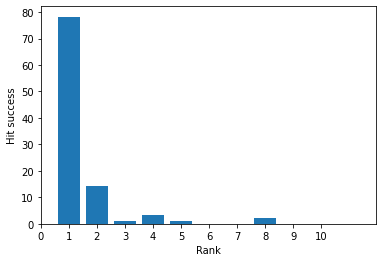

,Success rate in %
Rank,
1,78.26
2,14.13
3,1.09
4,3.26
5,1.09
8,2.17
11,0.00


In [33]:
ranks(InChIKeys(barcode),barcode)

<br> Synthetic rank success rate

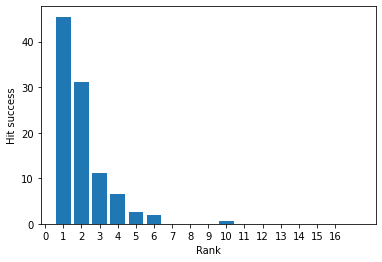

,Success rate in %
Rank,
1,45.45
2,31.17
3,11.04
4,6.49
5,2.60
6,1.95
7,0.00
8,0.00
10,0.65


In [36]:
ranks(InChIKeys(synthetic),synthetic)

<br>Counts and plots number of TP and FP hits for each record - e.g. counts how many records does have one (two, three, ...) TP/FP hits.

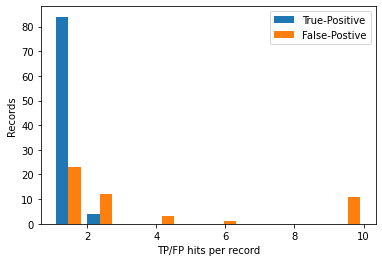

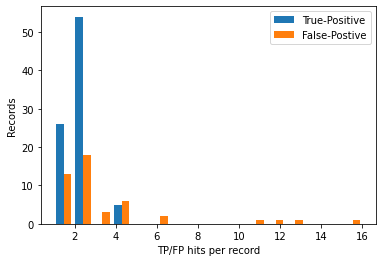

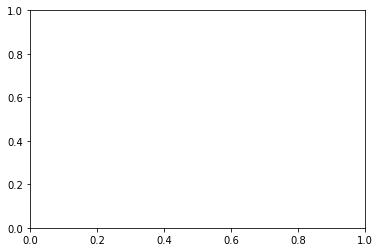

In [40]:
# Preloads
libraries = [barcode,synthetic]
libraries2 = ['Barcode','Synthetic']

# Calculate number of TP/FP hits per record and plot
for i in range(2):
  InChIKey = InChIKeys(libraries[i])
  TP_hits = (InChIKey[InChIKey['Positivity'] == True].groupby(
      ['InChIKey','Positivity']).count())['InChIKey_hits'].tolist()
  FP_hits = (InChIKey[InChIKey['Positivity'] == False].groupby(
      ['InChIKey','Positivity']).count())['InChIKey_hits'].tolist()
  if max(TP_hits) > max(FP_hits):
    bin = max(TP_hits)
  else:
    bin = max(FP_hits)
  plt.hist([TP_hits,FP_hits], bins=bin, label=['True-Positive', 'False-Postive'])
  plt.xlabel("TP/FP hits per record")
  plt.ylabel("Records")
  plt.legend(loc='upper right')
  plt.savefig(f"{libraries2[i]}_hist_metrics.png", dpi=600)
  plt.show()
  plt.cla()

               Pearson  Kendall  Spearman
Analyzer           NaN      NaN       NaN
Polarity           NaN      NaN       NaN
ScanRangeMax    0.2063   0.1474    0.1743
ScanRangeMin    0.1197   0.1197    0.1198
MsStageTarget      NaN      NaN       NaN
NCE             0.2161   0.2478    0.2710
IonActivation   0.1451   0.1451    0.1451


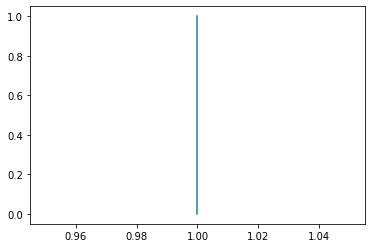

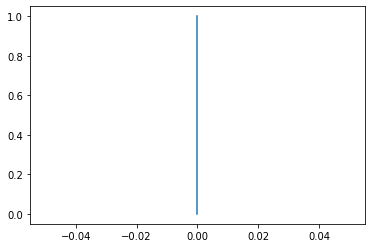

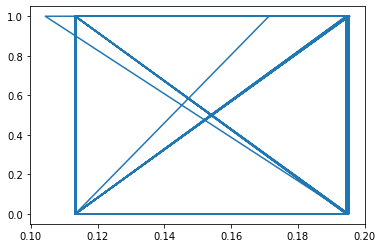

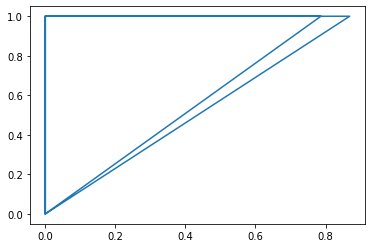

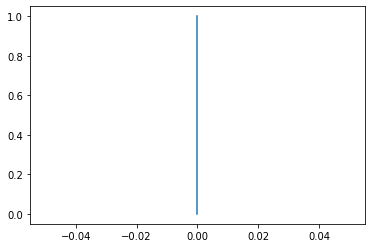

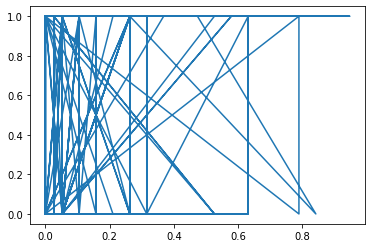

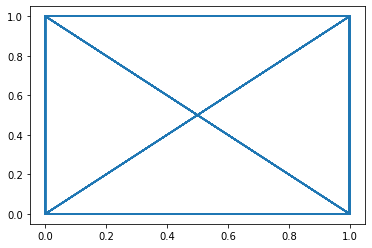

In [25]:
# Processed data/methods
meta_titles = ['Analyzer','Polarity','ScanRangeMax','ScanRangeMin',
              'MsStageTarget','NCE','IonActivation']
methods = ['pearson','kendall','spearman']
num = InChIKeys(barcode)
num = 1.0*num['Positivity']
[Differences, Values, Hits] = Metadatas(barcode)

# Calculation of correlation
crrC = {}
for j in meta_titles:
  df = pd.DataFrame({'Data': Differences[j],
                  'Positivity': num})
  crrl = []
  for i in range(3):
    crrl.append(round(df.corr(method=methods[i]).iloc[0,1],4))
  crrC[j] = crrl
  plt.figure()
  plt.plot(Differences[j],num)
crrC = pd.DataFrame.from_dict(crrC,orient='index',columns=[method.capitalize()
for method in methods])
print(crrC)
plt.show()